In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error

In [4]:
# Reading the dataset into a dataframe df.
df=pd.read_csv(r"C:\Users\hp\Desktop\student_performance_dataset.csv")
# Preprocessing dataset.
X=df.drop(columns=["Final_exam_score"])
y=df["Final_exam_score"]
X=pd.get_dummies(X,drop_first=True)
# Splitting dataset into training and testing data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Standardizing the dataset.
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
# Training the Linear Regression model.
model=LinearRegression()
model.fit(X_train,y_train)
# Cross-validation
cv_mse=cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv=10)
cv_mse_mean=-np.mean(cv_mse)
print(f"Mean Cross-Validated MSE: {cv_mse_mean:.2f}")

Mean Cross-Validated MSE: 40.78


R2 Score: 0.12
Test MSE: 58.92


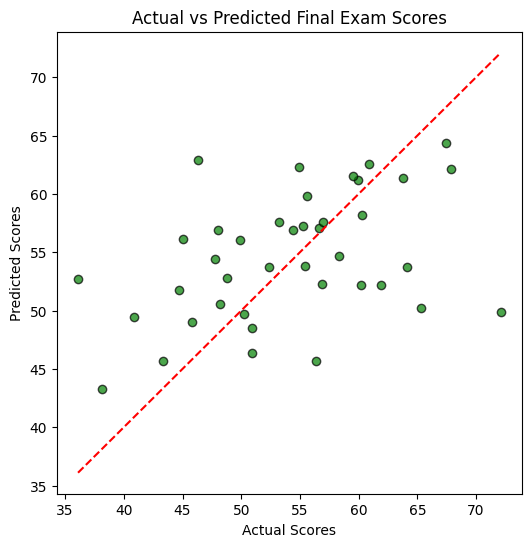

In [6]:
# Making predictions for the test set.
y_pred=model.predict(X_test)
# Evaluating the model.
# Compute evaluation metrics.
score=r2_score(y_test, y_pred)
mse=mean_squared_error(y_test, y_pred)
print(f"R2 Score: {score:.2f}")
print(f"Test MSE: {mse:.2f}")
# Visual comparison.
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.7,color='green',edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--',color='red')
plt.xlabel("Actual Scores")
plt.ylabel("Predicted Scores")
plt.title("Actual vs Predicted Final Exam Scores")
plt.show()